<a href="https://colab.research.google.com/github/SairajRajput12/2-Medical-registration-system-using-java-servelt-mysql-and-html-css-and-javascript-/blob/main/Apple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle

In [3]:
import json
kaggle_credentials = json.load(open("kaggle.json"))


In [4]:
import os
os.environ['KAGGLE_USERNAME'] = kaggle_credentials['username']
os.environ['KAGGLE_KEY'] = kaggle_credentials['key']

In [5]:
!kaggle datasets download -d abdallahalidev/plantvillage-dataset

Dataset URL: https://www.kaggle.com/datasets/abdallahalidev/plantvillage-dataset
License(s): CC-BY-NC-SA-4.0
100% 2.04G/2.04G [00:27<00:00, 181MB/s]
100% 2.04G/2.04G [00:27<00:00, 79.1MB/s]


In [6]:
import zipfile

with zipfile.ZipFile('/content/plantvillage-dataset.zip', 'r') as zip_ref:
    zip_ref.extractall()


In [8]:
# Number of files in /content/Apple/Apple___Apple_scab: 630
# Number of files in /content/Apple/Apple___Black_rot: 621
# Number of files in /content/Apple/Apple___Cedar_apple_rust: 275
# Number of files in /content/Apple/Apple___healthy: 1645
import os
import random

# Define the dataset directory and the target number of images per class
dataset_dir = "/content/Apple"
target_size = 275  # You can adjust this based on the minimum class size

# For each class (directory), randomly remove excess images
for class_dir in os.listdir(dataset_dir):
    class_path = os.path.join(dataset_dir, class_dir)

    if os.path.isdir(class_path):
        images = os.listdir(class_path)

        # If the class has more than 275 images, randomly remove the excess
        if len(images) > target_size:
            images_to_remove = random.sample(images, len(images) - target_size)

            for image in images_to_remove:
                os.remove(os.path.join(class_path, image))

            print(f"Removed {len(images_to_remove)} images from class {class_dir}")

print("Dataset balanced to 275 images per class!")





Dataset balanced to 275 images per class!


In [9]:
import os
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import keras
from keras.callbacks import EarlyStopping,ModelCheckpoint
import tensorflow as tf
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from tqdm import tqdm


In [10]:
def data(dataset_path):
    images = []
    labels = []
    for subfolder in tqdm(os.listdir(dataset_path)):
        subfolder_path = os.path.join(dataset_path, subfolder)
        for image_filename in os.listdir(subfolder_path):
            image_path = os.path.join(subfolder_path, image_filename)
            images.append(image_path)
            labels.append(subfolder)
    df = pd.DataFrame({'image': images, 'label': labels})
    return df


train = data('/content/Apple')
train.head()


X_train, X_test1, y_train, y_test1 = train_test_split(train['image'], train['label'], test_size=0.2, random_state=42,shuffle=True,stratify=train['label'])
X_val, X_test, y_val, y_test = train_test_split(X_test1,y_test1, test_size=0.5, random_state=42,shuffle=True,stratify=y_test1)
df_train = pd.DataFrame({'image': X_train, 'label': y_train})
df_test = pd.DataFrame({'image': X_test, 'label': y_test})
df_val = pd.DataFrame({'image': X_val, 'label': y_val})


100%|██████████| 4/4 [00:00<00:00, 1407.01it/s]


In [11]:
image_size = (224, 224)
batch_size = 32
datagen = ImageDataGenerator(
    rescale=1./255
)
train_datagen = ImageDataGenerator(
    rescale=1./255,
    #rotation_range=20,
    #width_shift_range=0.2,
    #height_shift_range=0.2,
    #shear_range=0.2,
    #zoom_range=0.2,
    horizontal_flip=True,
    #fill_mode='nearest'
)
train_generator = train_datagen.flow_from_dataframe(
    df_train,
    x_col='image',
    y_col='label',
    target_size=image_size,
    batch_size=batch_size,
    shuffle=True
)
test_generator = datagen.flow_from_dataframe(
    df_test,
    x_col='image',
    y_col='label',
    target_size=image_size,
    batch_size=batch_size,
    shuffle=False
)
val_generator = datagen.flow_from_dataframe(
    df_val,
    x_col='image',
    y_col='label',
    target_size=image_size,
    batch_size=batch_size,
    shuffle=False
)


Found 880 validated image filenames belonging to 4 classes.
Found 110 validated image filenames belonging to 4 classes.
Found 110 validated image filenames belonging to 4 classes.


In [12]:
class_ = test_generator.class_indices.keys()
class_ = list(class_)



In [20]:
model = keras.models.Sequential([
    keras.layers.Conv2D(32, kernel_size = (3,3), activation = 'relu', input_shape = (224,224,3)),
    keras.layers.MaxPooling2D(2,2),

    keras.layers.Conv2D(64, kernel_size = (3,3), activation = 'relu'),
    keras.layers.MaxPooling2D(2,2),

    keras.layers.Conv2D(64, kernel_size = (3,3), activation = 'relu'),
    keras.layers.MaxPooling2D(2,2),

    keras.layers.Conv2D(64, kernel_size = (3,3), activation = 'relu'),
    keras.layers.MaxPooling2D(2,2),

    keras.layers.Conv2D(64, kernel_size = (3,3), activation = 'relu'),
    keras.layers.MaxPooling2D(2,2),

    keras.layers.Conv2D(64, kernel_size = (3,3), activation = 'relu'),
    keras.layers.MaxPooling2D(2,2),

    keras.layers.Flatten(),

    keras.layers.Dense(64, activation='relu'),

    keras.layers.Dense(4, activation='softmax'),

])
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)                   │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 52, 52, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 26, 26, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 24, 24, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 10, 10, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 1, 1, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 4)                   │             260 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 171,524 (670.02 KB)

 Trainable params: 171,524 (670.02 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
checkpoint_cb =ModelCheckpoint("my_keras_model.keras", save_best_only=True)
early_stopping_cb =EarlyStopping(patience=5, restore_best_weights=True)
model.compile(optimizer ='adam', loss='categorical_crossentropy', metrics=['accuracy',keras.metrics.AUC()])
hist=model.fit(train_generator,epochs=10,validation_data=val_generator,callbacks=[checkpoint_cb,early_stopping_cb])


Epoch 1/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 9s 210ms/step - accuracy: 0.2636 - auc_2: 0.5109 - loss: 1.3879 - val_accuracy: 0.2636 - val_auc_2: 0.6030 - val_loss: 1.3750
Epoch 2/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 5s 74ms/step - accuracy: 0.3307 - auc_2: 0.6079 - loss: 1.3484 - val_accuracy: 0.6091 - val_auc_2: 0.8520 - val_loss: 0.9846
Epoch 3/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - accuracy: 0.6638 - auc_2: 0.8736 - loss: 0.8684 - val_accuracy: 0.8182 - val_auc_2: 0.9620 - val_loss: 0.4772
Epoch 4/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - accuracy: 0.7678 - auc_2: 0.9367 - loss: 0.5896 - val_accuracy: 0.6909 - val_auc_2: 0.8993 - val_loss: 0.8269
Epoch 5/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 87ms/step - accuracy: 0.8181 - auc_2: 0.9528 - loss: 0.5051 - val_accuracy: 0.8545 - val_auc_2: 0.9713 - val_loss: 0.4116
Epoch 6/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - accuracy: 0.7885 - auc_2: 0.9460 - loss: 0.5609 - val_accuracy: 0.8364 - val_auc_2: 0.9661 - val_loss: 0.4256
Epoch 7/10
28/28 ━━━━

In [22]:
print(class_)

['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy']


In [25]:
score, acc,auc = model.evaluate(test_generator)
print('Test Loss =', score)
print('Test Accuracy =', acc)
print('Test AUC =', auc)

hist_=pd.DataFrame(hist.history)
hist_



4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.7893 - auc_2: 0.9709 - loss: 0.4055
Test Loss = 0.40487220883369446
Test Accuracy = 0.7909091114997864
Test AUC = 0.9704821109771729


,accuracy,auc_2,loss,val_accuracy,val_auc_2,val_loss
0,0.255682,0.512936,1.386650,0.263636,0.602961,1.375039
1,0.397727,0.663420,1.290801,0.609091,0.852011,0.984625
2,0.711364,0.897224,0.768798,0.818182,0.961970,0.477250
3,0.772727,0.945210,0.551238,0.690909,0.899311,0.826892
4,0.771591,0.941144,0.571829,0.854545,0.971322,0.411648
5,0.784091,0.946352,0.557049,0.836364,0.966088,0.425608
6,0.819318,0.961770,0.457978,0.872727,0.969187,0.411061
7,0.820455,0.960886,0.461502,0.790909,0.959862,0.465337
8,0.797727,0.954084,0.507262,0.845455,0.960523,0.480421
9,0.820455,0.959948,0.473778,0.836364,0.971295,0.413638


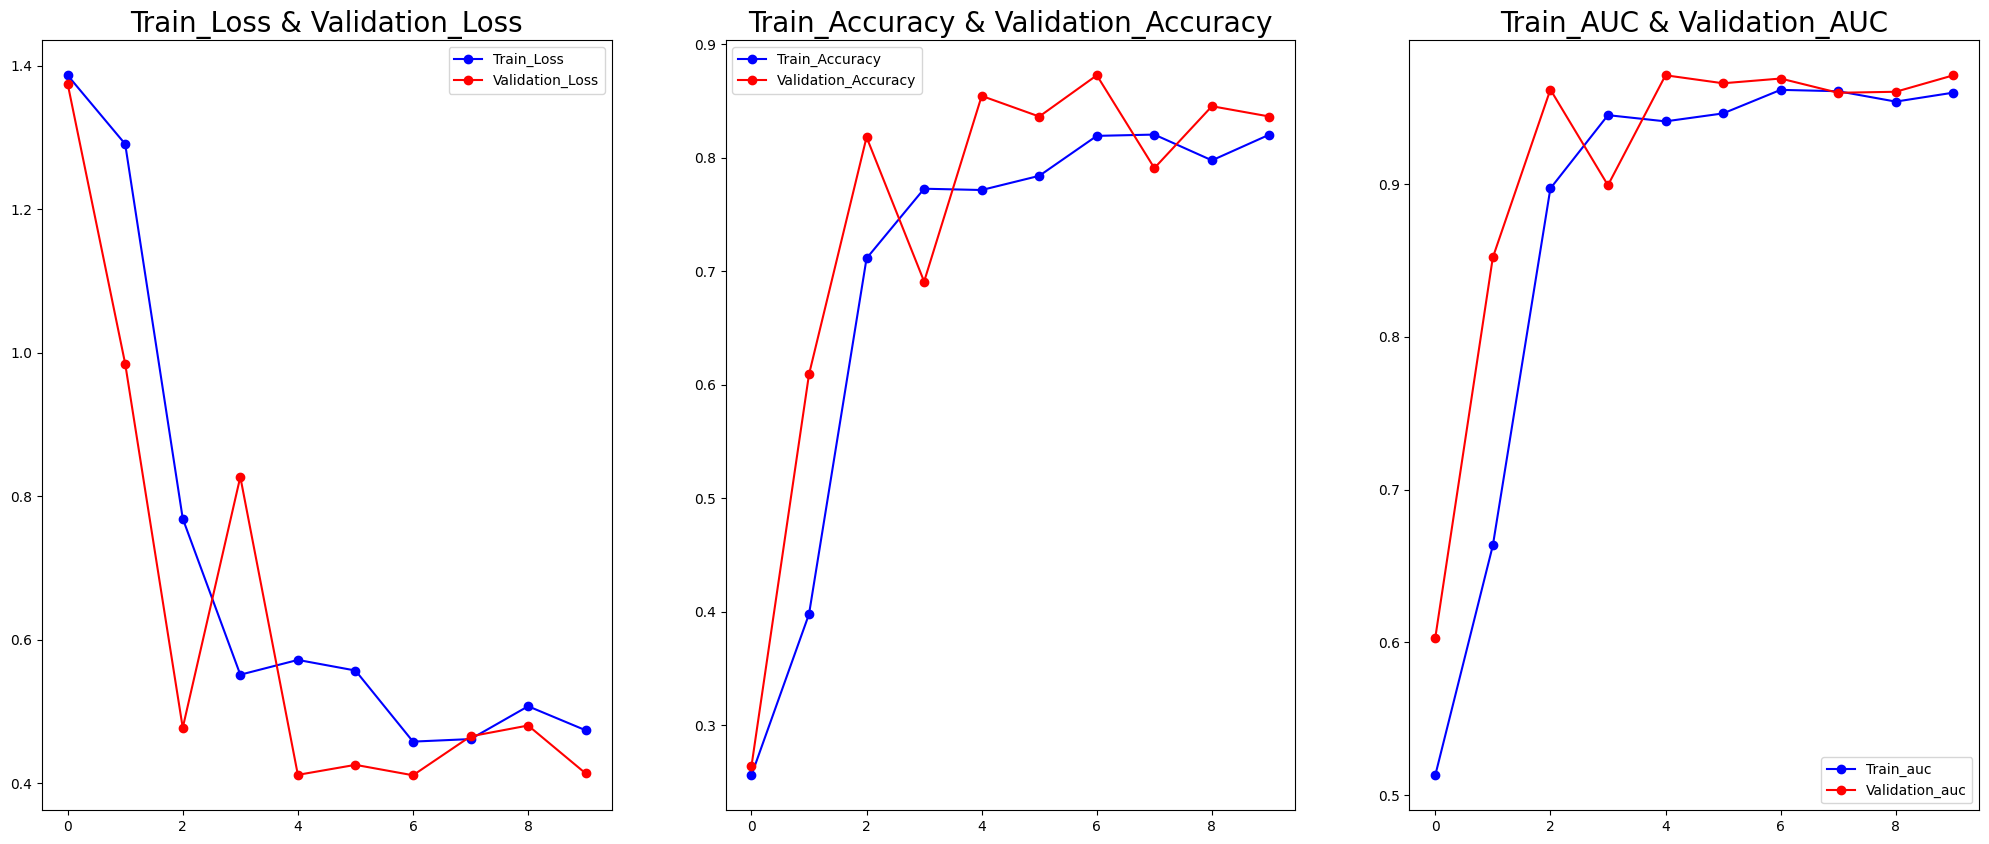

In [26]:
plt.figure(figsize=(25,10))
plt.subplot(1,3,1)
plt.plot(hist_['loss'],'b-o',label='Train_Loss')
plt.plot(hist_['val_loss'],'r-o',label='Validation_Loss')
plt.title('Train_Loss & Validation_Loss',fontsize=20)
plt.legend()
plt.subplot(1,3,2)
plt.plot(hist_['accuracy'],'b-o',label='Train_Accuracy')
plt.plot(hist_['val_accuracy'],'r-o',label='Validation_Accuracy')
plt.title('Train_Accuracy & Validation_Accuracy',fontsize=20)
plt.legend()
plt.subplot(1,3,3)
plt.plot(hist_.iloc[:,1],'b-o',label='Train_auc')
plt.plot(hist_.iloc[:,4],'r-o',label='Validation_auc')
plt.title('Train_AUC & Validation_AUC',fontsize=20)
plt.legend()
plt.show()


In [27]:
# Get true labels
y_test = test_generator.classes
# Predict probabilities for each class
predictions = model.predict(test_generator)
# Convert predicted probabilities to class labels (choose the class with the highest probability)
y_pred = np.argmax(predictions, axis=1)
# Flatten both arrays just in case
y_test = np.ravel(y_test)
y_pred = np.ravel(y_pred)
# Create a DataFrame to compare actual vs predicted labels
df = pd.DataFrame({'Actual': y_test, 'Prediction': y_pred})
# Display the DataFrame
df.head()  # Show the first few rows of the comparison


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 139ms/step


,Actual,Prediction
0,3,0
1,3,3
2,1,1
3,2,2
4,0,0


In [28]:
ClassificationReport = classification_report(y_test,y_pred,target_names=class_)
print('Classification Report is : ', ClassificationReport)


Classification Report is :                            precision    recall  f1-score   support

      Apple___Apple_scab       0.64      0.75      0.69        28
       Apple___Black_rot       0.91      0.78      0.84        27
Apple___Cedar_apple_rust       0.96      0.96      0.96        28
         Apple___healthy       0.69      0.67      0.68        27

                accuracy                           0.79       110
               macro avg       0.80      0.79      0.79       110
            weighted avg       0.80      0.79      0.79       110



In [29]:
model.save('apple.h5')